#  Catalogs Self-Calibration

---
**License**

 Catalogs Self-Calibration

 Sat Jul 7 11:00:00 2025\
 Copyright  2025\
 Cinthia Nunes de Lima <cinthia.n.lima@uel.br> \ Henique Cardoso Naves Lettieri <henrique.cnl23@uel.br> \ Sandro Dias Pinto Vitenti <vitenti@uel.br>

---
---
 catalogs_selfcalibration\
 Copyright (C) 2025 Cinthia Nunes de Lima <cinthia.n.lima@uel.br>, Henrique Cardoso Naves Lettieri <henrique.cnl23@uel.br>, Sandro Dias Pinto Vitenti <vitenti@uel.br>

 numcosmo is free software: you can redistribute it and/or modify it
 under the terms of the GNU General Public License as published by the
 Free Software Foundation, either version 3 of the License, or
 (at your option) any later version.

 numcosmo is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
 See the GNU General Public License for more details.

 You should have received a copy of the GNU General Public License along
 with this program.  If not, see <http://www.gnu.org/licenses/>.
 
---

## Libraries & Configs

In [1]:
import sys
sys.path.insert(0, "/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/")
sys.path.insert(0, "/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/ESMCMC")

from esmcmc_rm_relation_script import catalog_fit, esmcmc

#NumCosmo
from numcosmo_py import Ncm, Nc, GObject
Ncm.cfg_init()
Ncm.cfg_set_log_handler(lambda msg: sys.stdout.write(msg) and sys.stdout.flush())

#Useful packages
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

import matplotlib as mpl


#GCR Catalogs
sys.path.insert(0, "/global/homes/c/cinlima/gcr-catalogs")
import GCRCatalogs
GCRCatalogs.set_root_dir_by_site("nersc")

#Corner plots 
from getdist import plots
from getdist.mcsamples import  MCSamples
import getdist
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

import pygtc
from IPython.display import display, Math
%matplotlib inline

GetDist Version: 1.5.3, Matplotlib version: 3.10.0


## Data

In [2]:
id_data = Table.read('/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/CatalogsMatching/match_ID.fits')
proximity_data = Table.read('/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/CatalogsMatching/match_proximity.fits')
clevar_data = Table.read('/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/CatalogsMatching/match_clevar.fits')

id_data['halo_mass'].name = 'mass'
clevar_data['halo_mass'].name = 'mass'
proximity_data['R'].name = 'richness'
proximity_data['z'].name = 'redshift'

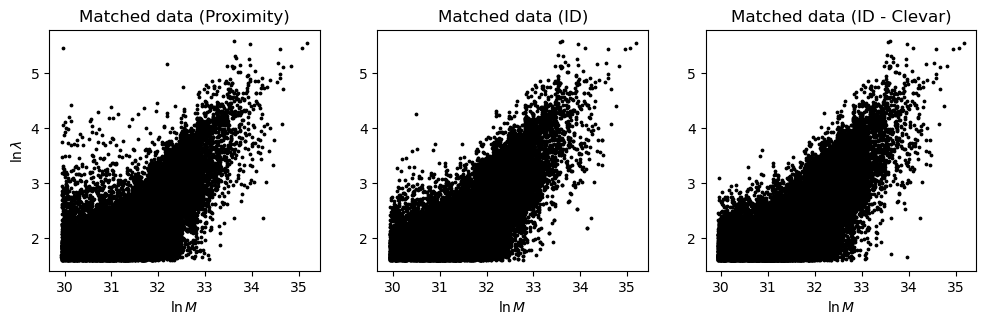

In [3]:
# clevar_data

fig, axs = plt.subplots(1, 3, figsize=(10,3))
fig.tight_layout() 

axs[0].scatter(np.log(proximity_data['mass']), np.log(proximity_data['richness']), c= 'k', s=3)
axs[0].set_ylabel('$\ln \lambda$')
axs[0].set_xlabel('$\ln M$')
axs[0].set_title('Matched data (Proximity)')

axs[1].scatter(np.log(id_data['mass']), np.log(id_data['richness']), c= 'k', s=3)
axs[1].set_xlabel('$\ln M$')
axs[1].set_title('Matched data (ID)')

axs[2].scatter(np.log(clevar_data['mass']), np.log(clevar_data['richness']), c= 'k', s=3)
axs[2].set_xlabel('$\ln M$')
axs[2].set_title('Matched data (ID - Clevar)')

plt.show()

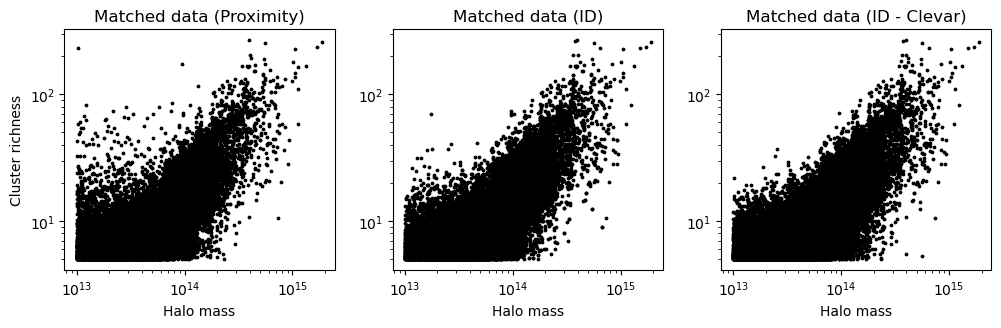

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(10,3))
fig.tight_layout() 

axs[0].scatter(proximity_data['mass'], proximity_data['richness'], c= 'k', s=3)
axs[0].set_ylabel('Cluster richness')
axs[0].set_xlabel('Halo mass')
axs[0].set_title('Matched data (Proximity)')
axs[0].set_yscale('log')
axs[0].set_xscale('log')

axs[1].scatter(id_data['mass'], id_data['richness'], c= 'k', s=3)
axs[1].set_xlabel('Halo mass')
axs[1].set_title('Matched data (ID)')
axs[1].set_yscale('log')
axs[1].set_xscale('log')

axs[2].scatter(clevar_data['mass'], clevar_data['richness'], c= 'k', s=3)
axs[2].set_xlabel('Halo mass')
axs[2].set_title('Matched data (ID - Clevar)')
axs[2].set_yscale('log')
axs[2].set_xscale('log')

plt.show()

## MCMC

In [22]:
N_WALKERS = 1200
# N_RUN = 400

In [23]:
# esmcmc(id_data, 5, N_WALKERS, N_RUN, 'asc', 'id.fits')

In [24]:
# esmcmc(clevar_data, 5, N_WALKERS, N_RUN, 'asc', 'id_clevar.fits')

In [25]:
# esmcmc(proximity_data, 5, N_WALKERS, N_RUN, 'asc', 'proximity.fits')

In [26]:
mcat1 = Ncm.MSetCatalog.new_from_file_ro('id.fits', N_WALKERS1 * 75)
mset1 = mcat1.get_mset()
model1 = mset1.peek_by_name('NcClusterMass')

mcat2 = Ncm.MSetCatalog.new_from_file_ro('id_clevar.fits', N_WALKERS1 * 75)
mset2 = mcat2.get_mset()
model2 = mset2.peek_by_name('NcClusterMass')

mcat3 = Ncm.MSetCatalog.new_from_file_ro('proximity.fits', N_WALKERS1 * 70)
mset3 = mcat3.get_mset()
model3 = mset3.peek_by_name('NcClusterMass')

In [69]:
# mset1.pretty_log()
# mset2.pretty_log()
# mset3.pretty_log()

In [116]:
mean1 = np.array([model1.get_mean(np.log(id_data['mass'])[i], id_data['redshift'][i]) for i in range(len(id_data['mass']))])
std1 = np.array([model1.get_std(np.log(id_data['mass'])[i], id_data['redshift'][i]) for i in range(len(id_data['mass']))])

mean2 = np.array([model2.get_mean(np.log(proximity_data['mass'])[i], proximity_data['redshift'][i]) for i in range(len(proximity_data['mass']))])
std2 = np.array([model2.get_std(np.log(proximity_data['mass'])[i], proximity_data['redshift'][i]) for i in range(len(proximity_data['mass']))])

mean3 = np.array([model3.get_mean(np.log(clevar_data['mass'])[i], clevar_data['redshift'][i]) for i in range(len(clevar_data['mass']))])
std3 = np.array([model3.get_std(np.log(clevar_data['mass'])[i], clevar_data['redshift'][i]) for i in range(len(clevar_data['mass']))])

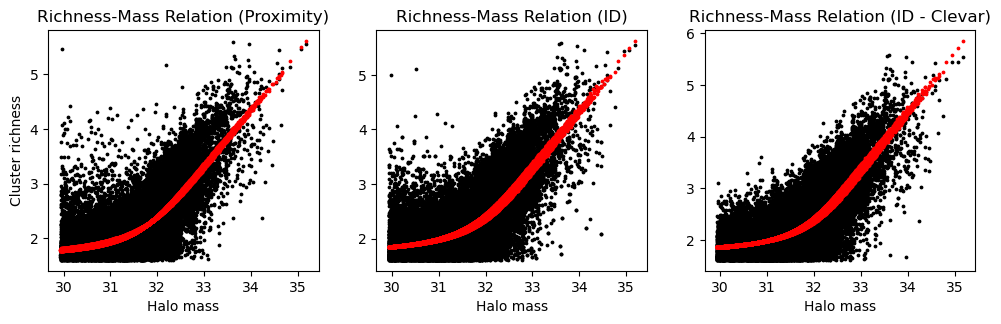

In [117]:
fig, axs = plt.subplots(1, 3, figsize=(10,3))
fig.tight_layout() 

axs[0].scatter(np.log(proximity_data['mass']), np.log(proximity_data['richness']), c= 'k', s=3)
axs[0].scatter(np.log(proximity_data['mass']),  mean2, c= 'r', s=3)
axs[0].set_ylabel('Cluster richness')
axs[0].set_xlabel('Halo mass')
axs[0].set_title('Richness-Mass Relation (Proximity)')
# axs[0].set_yscale('log')
# axs[0].set_xscale('log')

axs[1].scatter(np.log(id_data['mass']), np.log(id_data['richness']), c= 'k', s=3)
axs[1].scatter(np.log(id_data['mass']),  mean1, c= 'r', s=3)
axs[1].set_xlabel('Halo mass')
axs[1].set_title('Richness-Mass Relation (ID)')
# axs[1].set_yscale('log')
# axs[1].set_xscale('log')

axs[2].scatter(np.log(clevar_data['mass']), np.log(clevar_data['richness']), c= 'k', s=3)
axs[2].scatter(np.log(clevar_data['mass']),  mean3, c= 'r', s=3)
axs[2].set_xlabel('Halo mass')
axs[2].set_title('Richness-Mass Relation (ID - Clevar)')
# axs[2].set_yscale('log')
# axs[2].set_xscale('log')

plt.show()

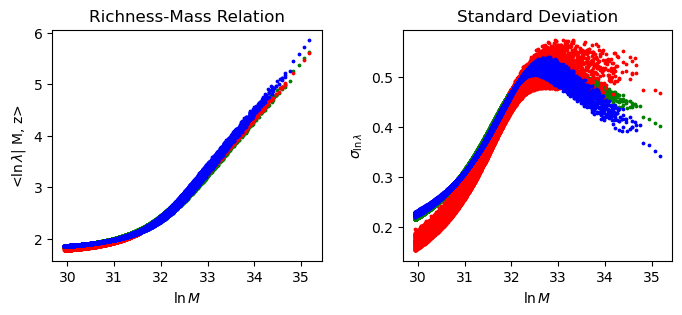

In [111]:
fig, axs = plt.subplots(1, 2, figsize=(8,3))
plt.subplots_adjust(wspace=0.3)

axs[0].scatter(np.log(id_data['mass']),  mean1, c= 'g', s=3)
axs[0].scatter(np.log(proximity_data['mass']),  mean2, c= 'r', s=3)
axs[0].scatter(np.log(clevar_data['mass']),  mean3, c= 'b', s=3)

axs[0].set_ylabel('<$\ln\lambda$| M, z>')
axs[0].set_xlabel('$\ln M$')
axs[0].set_title('Richness-Mass Relation')

axs[1].scatter(np.log(id_data['mass']),  std1, c= 'g', s=3)
axs[1].scatter(np.log(proximity_data['mass']),  std2, c= 'r', s=3)
axs[1].scatter(np.log(clevar_data['mass']),  std3, c= 'b', s=3)
axs[1].set_xlabel('$\ln M$')
axs[1].set_ylabel('$\sigma_{\ln \lambda}$')
axs[1].set_title('Standard Deviation')

plt.show()

In [65]:
# mcat1.get_full_covar().cov_dup_cor().log_vals('cov: ', '%.10f')
# mcat1.log_full_covar()